In [1]:
import pandas as pd
import numpy as np

from header.preprocessing.utils import get_targetCompany
from header.preprocessing.time import calculate_average, calculate_maximum, calculate_minimum, str2datetime
from header.evaluate import regression_report, plot_result

import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge

company_lst = [
    'AAPL', 'AXP', 'BA', 'CAT',
    'CSCO', 'HD', 'IBM', 'JNJ',
    'JPM', 'KO', 'MCD', 'MMM',
    'MRK', 'MSFT', 'PFE', 'PG',
    'TRV', 'V', 'VZ', 'WBA', 'XOM'
]

# Target company
1. AAPL,apple
2. GOOG,Google Inc
3. GOOGL,Google Inc
4. AMZN,Amazon.com
5. TSLA,Tesla Inc
6. MSFT,Microsoft

## Model training
1. BayesianRidge

AAPL start...
mae: 1.5850, rmse: 2.1347, mape: 0.0144, r2: 0.9945



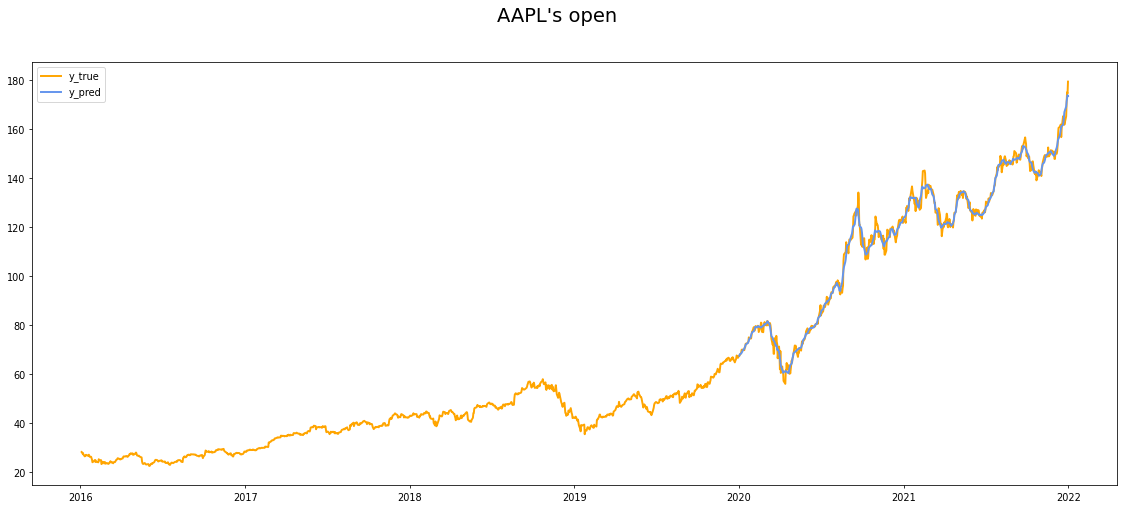

AXP start...
mae: 2.1478, rmse: 3.0507, mape: 0.0184, r2: 0.9899



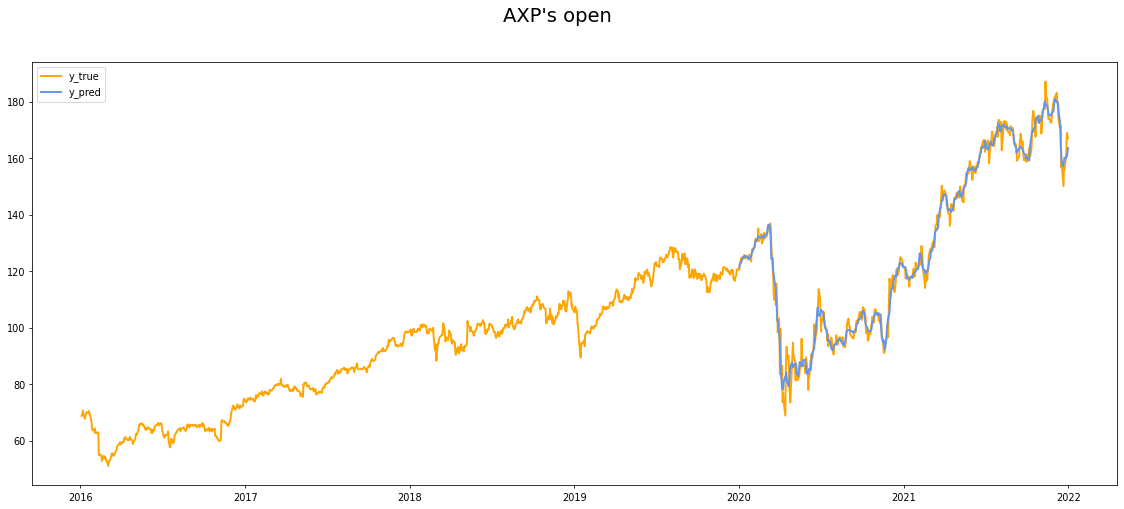

BA start...
mae: 4.7416, rmse: 7.1794, mape: 0.0250, r2: 0.9816



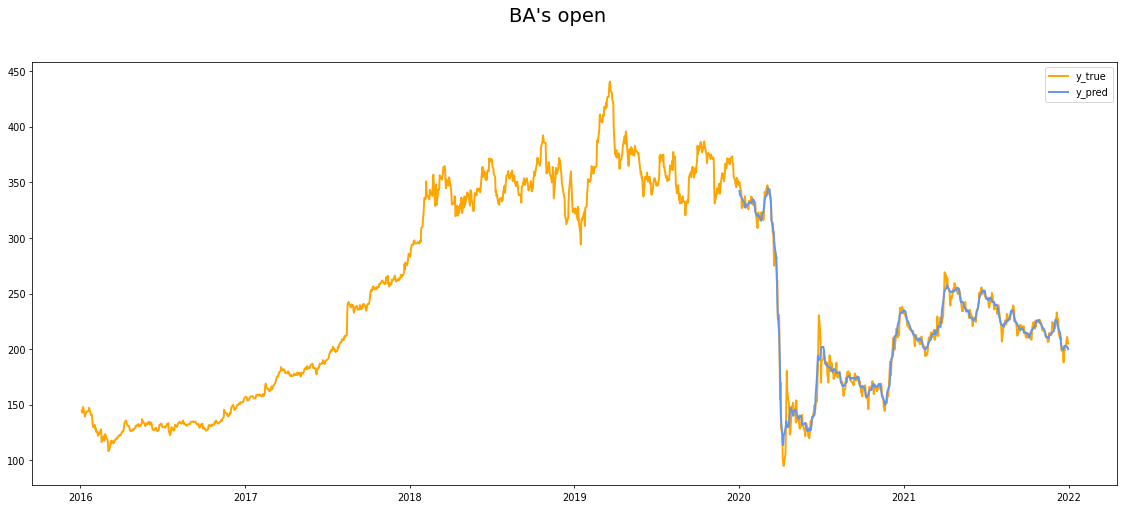

CAT start...
mae: 2.5407, rmse: 3.2814, mape: 0.0158, r2: 0.9936



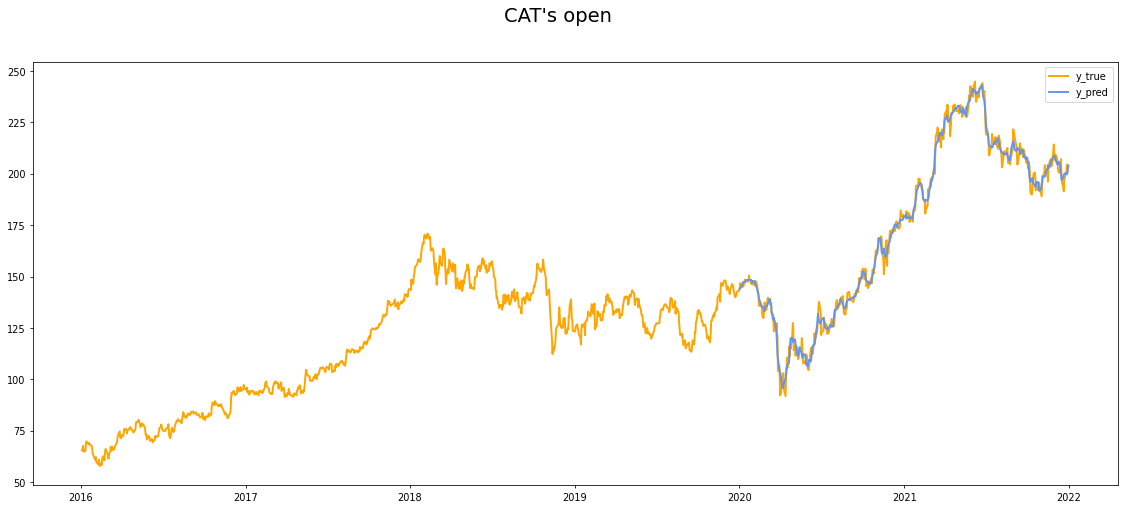

CSCO start...
mae: 0.5344, rmse: 0.7389, mape: 0.0117, r2: 0.9854



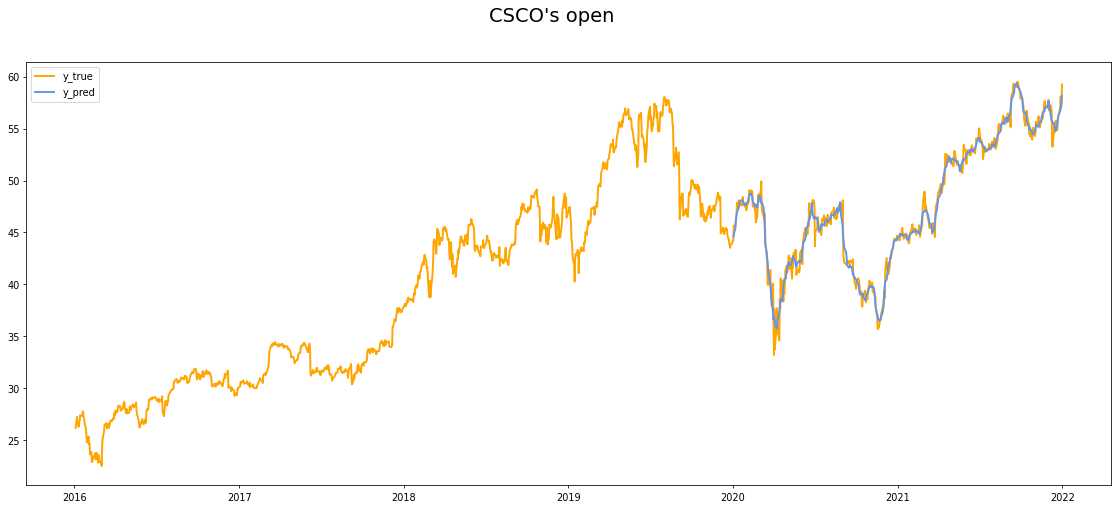

HD start...
mae: 3.1083, rmse: 4.4558, mape: 0.0120, r2: 0.9921



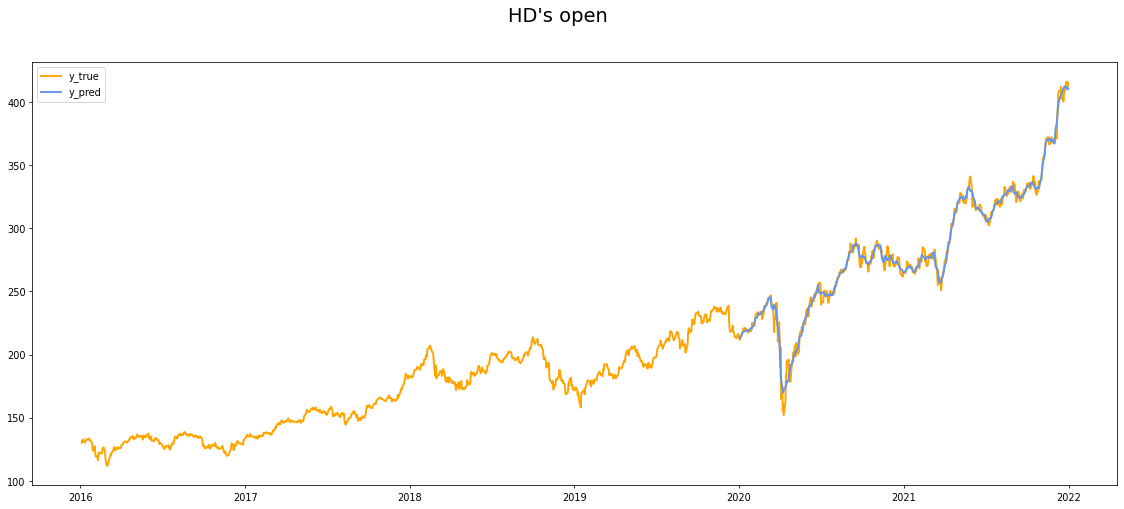

IBM start...
mae: 1.5642, rmse: 2.2094, mape: 0.0130, r2: 0.9559



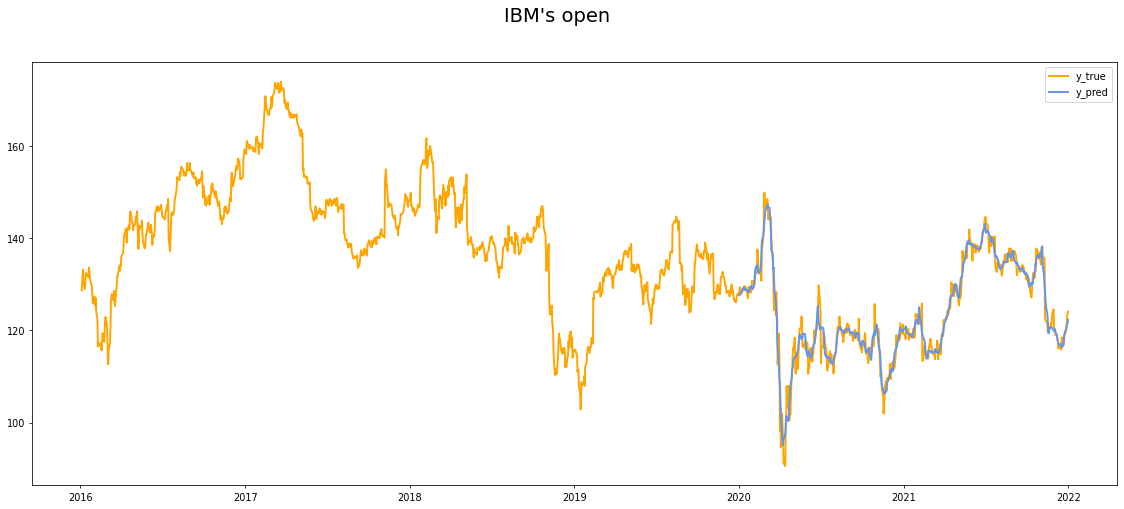

JNJ start...
mae: 1.3241, rmse: 1.9172, mape: 0.0089, r2: 0.9715



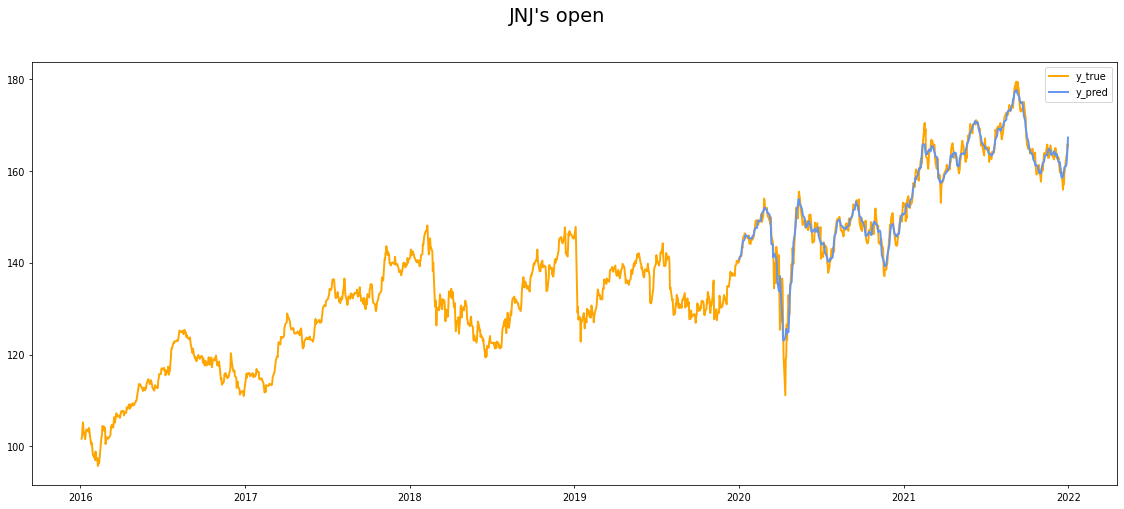

JPM start...
mae: 1.7719, rmse: 2.5228, mape: 0.0149, r2: 0.9916



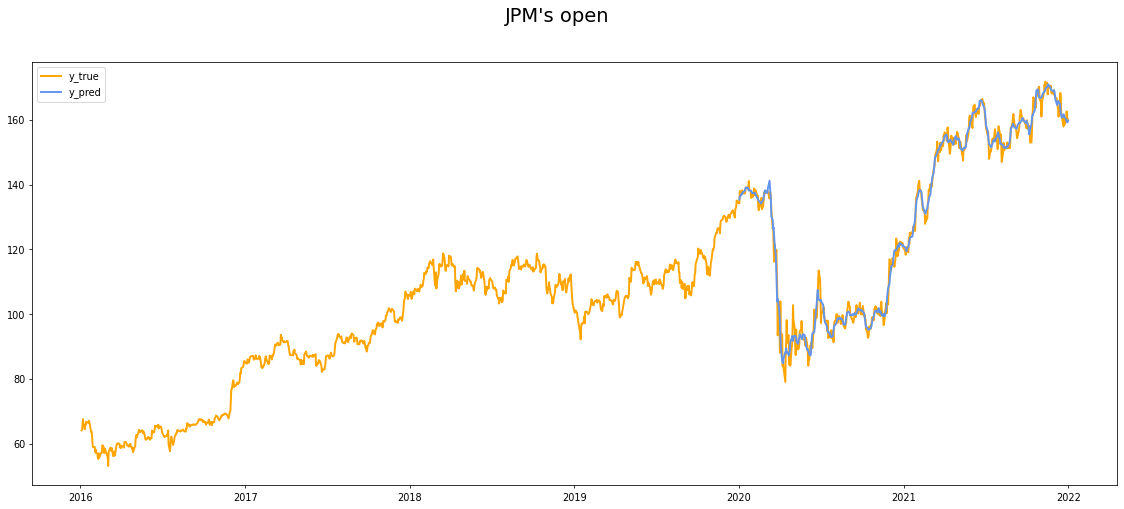

KO start...
mae: 0.5148, rmse: 0.7719, mape: 0.0103, r2: 0.9655



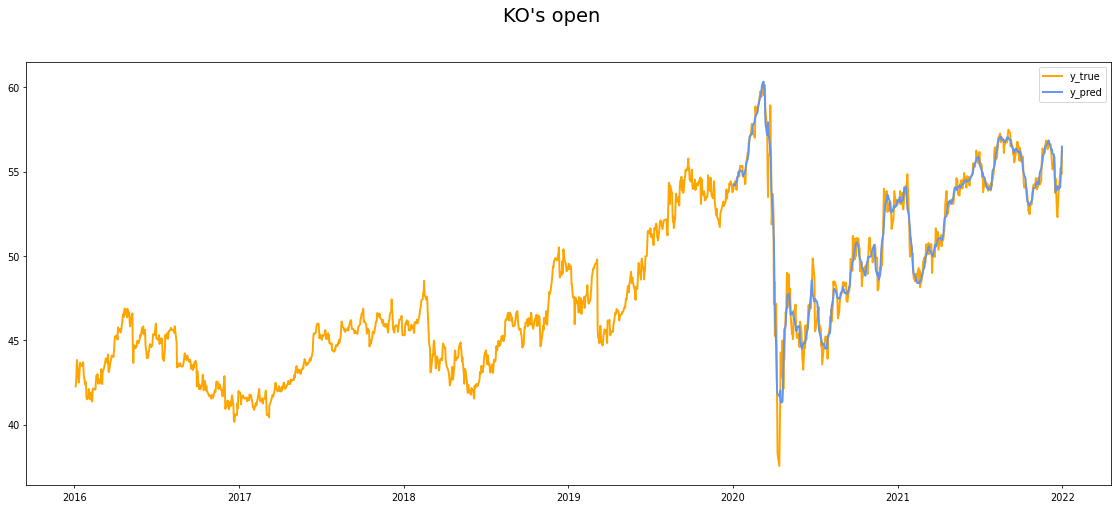

MCD start...
mae: 2.0721, rmse: 2.9960, mape: 0.0102, r2: 0.9826



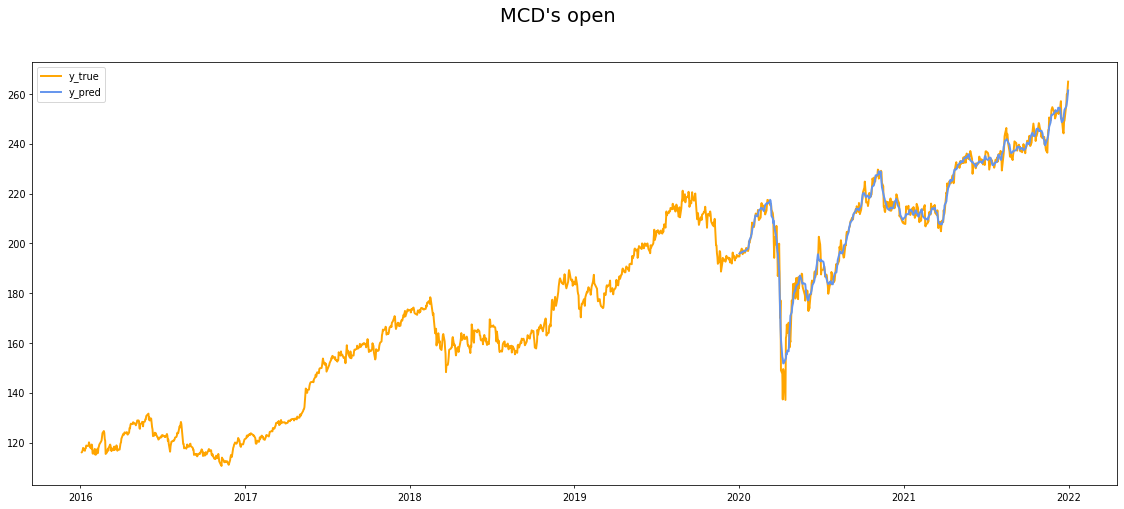

MMM start...
mae: 1.9779, rmse: 2.6679, mape: 0.0120, r2: 0.9785



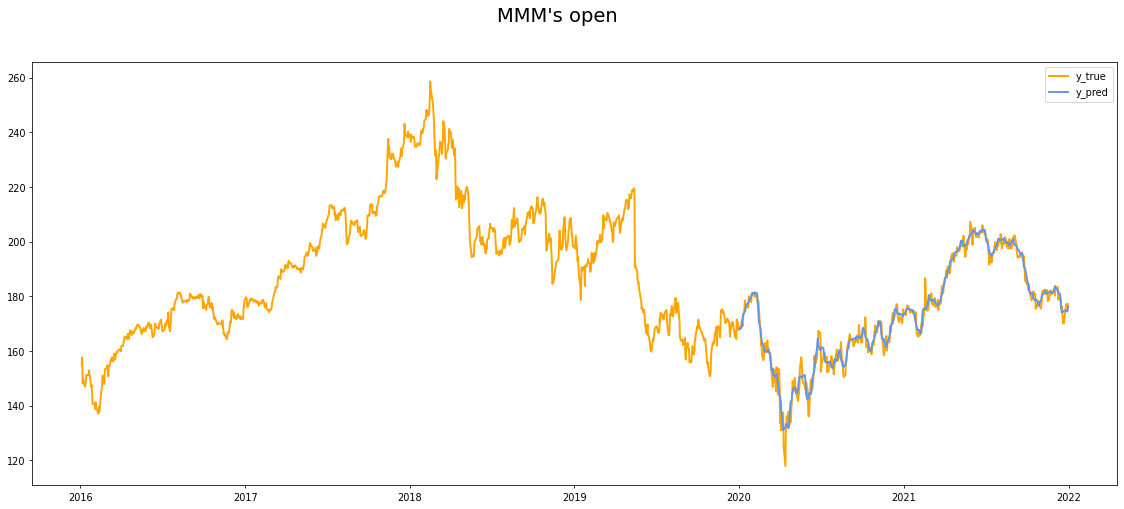

MRK start...
mae: 0.8678, rmse: 1.1784, mape: 0.0113, r2: 0.9231



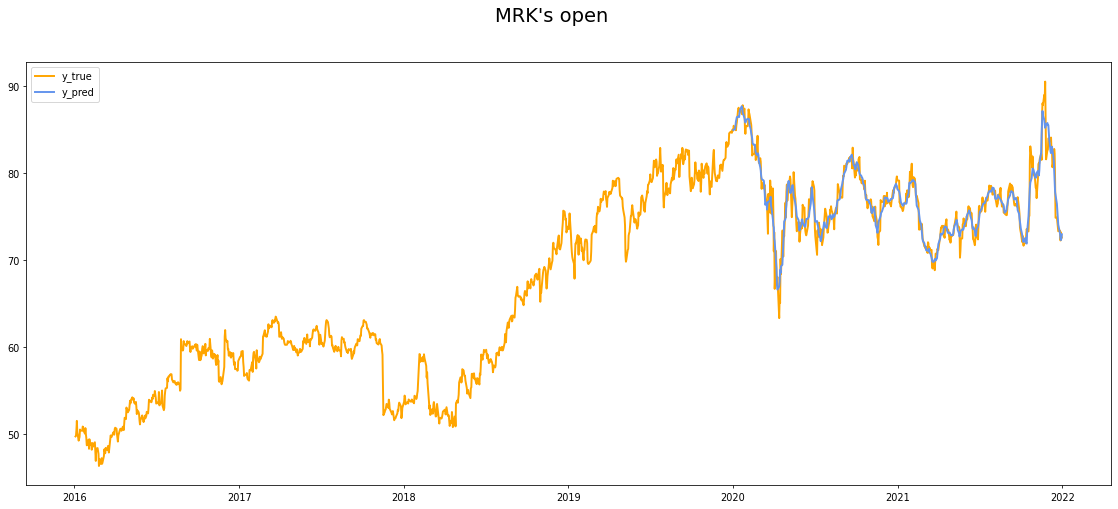

MSFT start...
mae: 2.6419, rmse: 3.4944, mape: 0.0122, r2: 0.9952



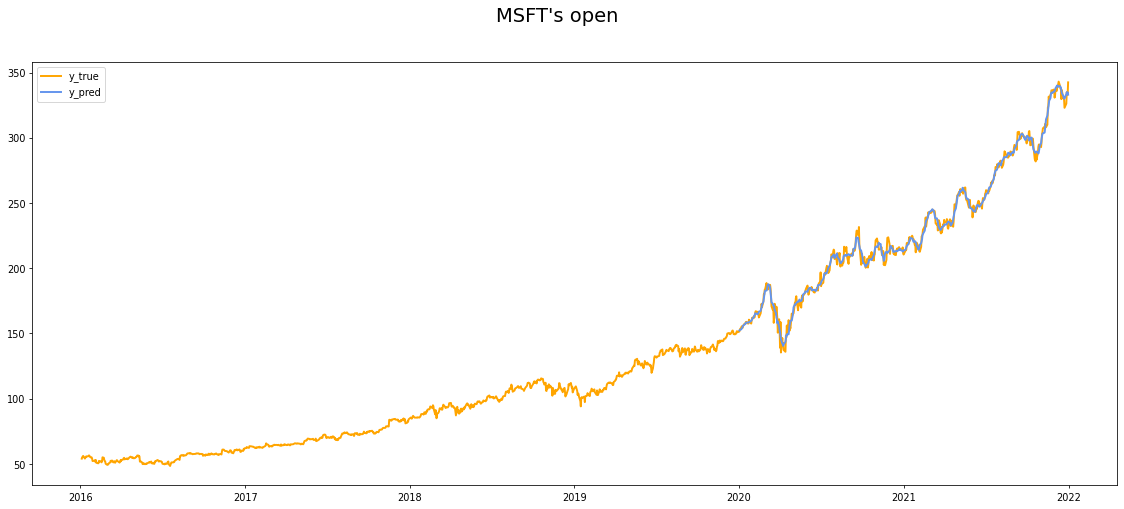

PFE start...
mae: 0.4442, rmse: 0.6012, mape: 0.0118, r2: 0.9857



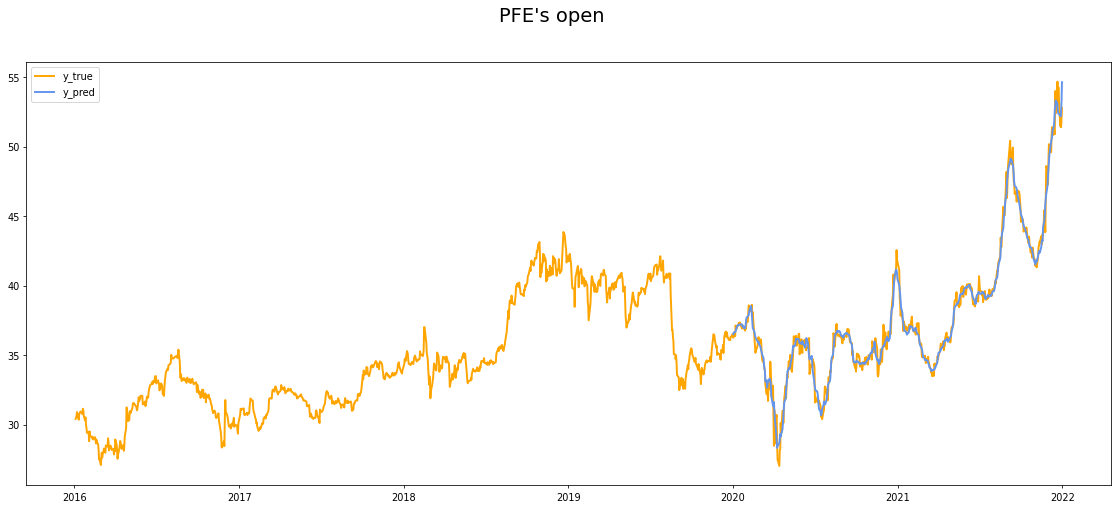

PG start...
mae: 1.0986, rmse: 1.7569, mape: 0.0087, r2: 0.9708



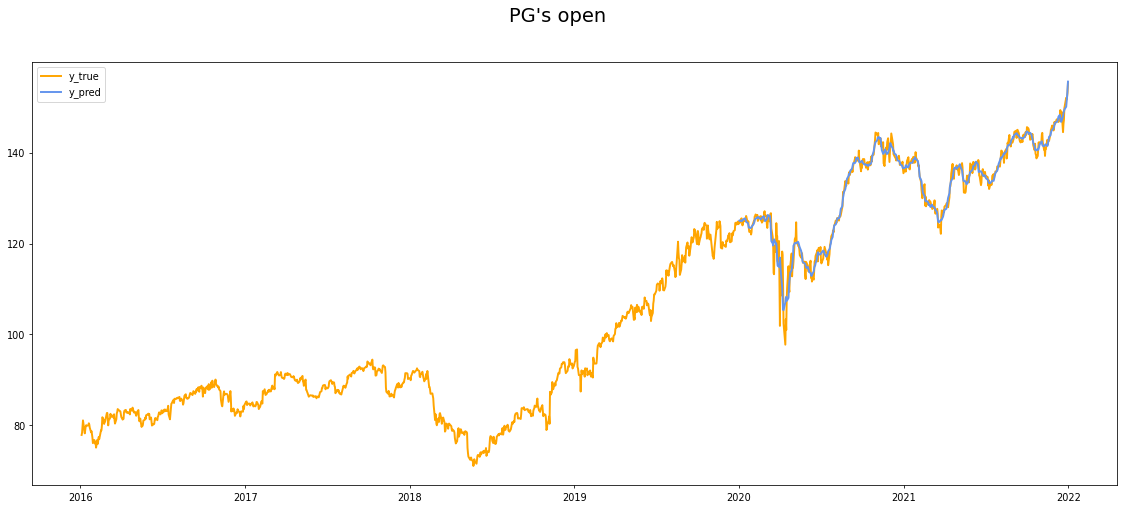

TRV start...
mae: 1.7668, rmse: 2.4683, mape: 0.0140, r2: 0.9853



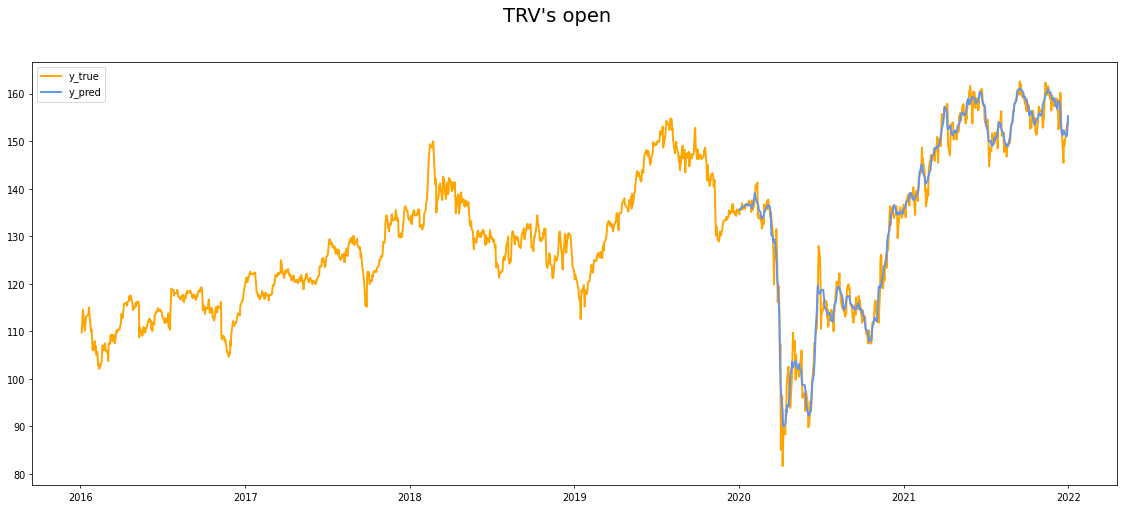

V start...
mae: 2.6977, rmse: 3.6782, mape: 0.0135, r2: 0.9671



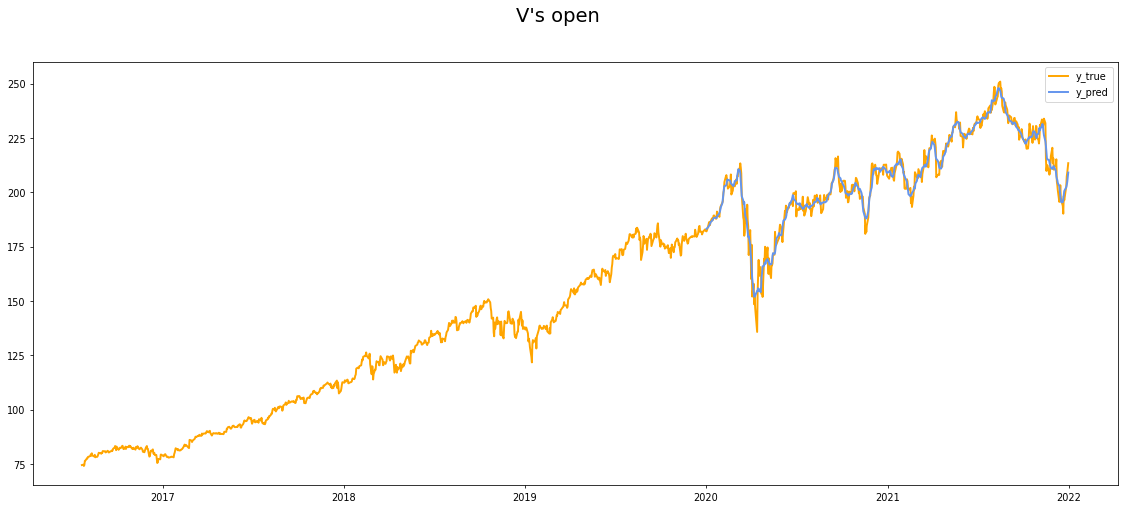

VZ start...
mae: 0.4443, rmse: 0.6296, mape: 0.0079, r2: 0.9411



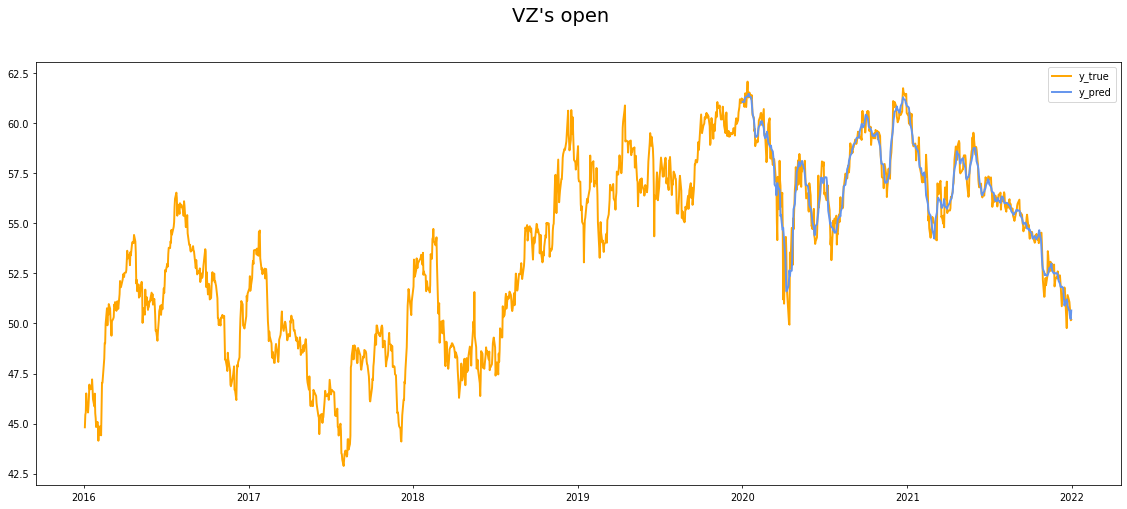

WBA start...
mae: 0.7843, rmse: 1.1063, mape: 0.0171, r2: 0.9666



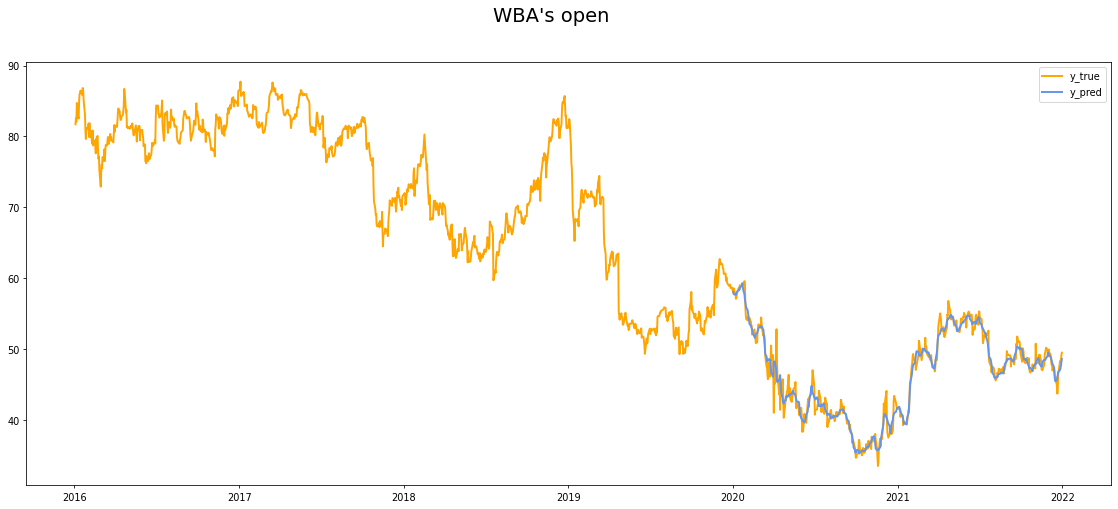

XOM start...
mae: 0.8620, rmse: 1.1245, mape: 0.0177, r2: 0.9886



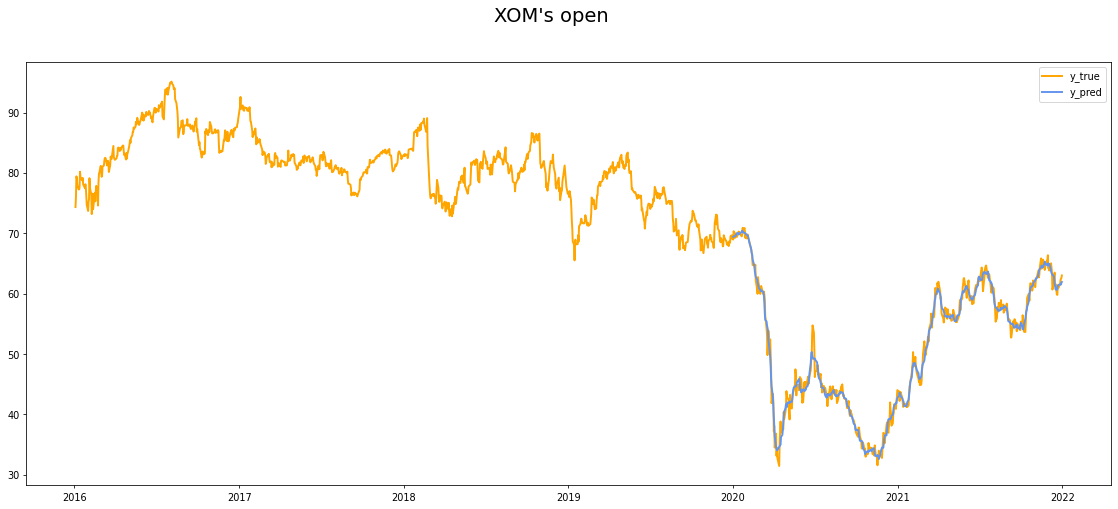

In [6]:
# Get baseline
target = 'Predict_Close'
test_start = pd.to_datetime("2020-01-01")

benchmark_dict = dict()
benchmark_dict['mae'] = np.zeros(len(company_lst))
benchmark_dict['rmse'] = np.zeros(len(company_lst))
benchmark_dict['mape'] = np.zeros(len(company_lst))
benchmark_dict['r2'] = np.zeros(len(company_lst))

for i, company in enumerate(company_lst):
    print(f'{company} start...')
    df = pd.read_pickle(f'./data/fe/stock_market_data/{company}.pkl')
    
    train = df[df['Date'] < test_start].reset_index(drop = True)
    test = df[df['Date'] >= test_start].reset_index(drop = True)
    
    y_train = np.asarray(train[target])
    x_train = np.asarray(train.drop(columns = ['Date', target]))
    
    y_test = np.asarray(test[target])
    x_test = np.asarray(test.drop(columns = ['Date', target]))
    
    Y = np.asarray(df[target])
    X = np.asarray(df.drop(columns = ['Date', target]))
#     x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle = True)
    
    x_train, y_train = shuffle(x_train, y_train)
    
    # print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
    
    model = BayesianRidge()
    
    model.fit(x_train, y_train)
    
    pred = model.predict(x_test)
    mae, rmse, mape, r2 = regression_report(y_test, pred, verbose = False)
    
    benchmark_dict['mae'][i] = mae
    benchmark_dict['rmse'][i] = rmse
    benchmark_dict['mape'][i] = mape
    benchmark_dict['r2'][i] = r2
    
    print(f'mae: {mae:.4f}, rmse: {rmse:.4f}, mape: {mape:.4f}, r2: {r2:.4f}\n')
    
    Date = df['Date']
    start1 = df.shape[0] // 2
    start2 = df.shape[0] - y_test.shape[0]
#     pred = model.predict(X)
    
#     plt.figure()
#     plt.plot(Y)
#     plt.plot(pred)
#     plt.show()
    
    
    plot_result(Y, pred, start1, start2, date = Date, title = f"{company}'s open")

In [8]:
mae = benchmark_dict['mae'][i].mean()
rmse = benchmark_dict['rmse'][i].mean()
mape = benchmark_dict['mape'][i].mean()
r2 = benchmark_dict['r2'][i].mean()

print(f'mae: {mae:.4f}, rmse: {rmse:.4f}, mape: {mape:.4f}, r2: {r2:.4f}')

mae: 0.8620, rmse: 1.1245, mape: 0.0177, r2: 0.9886


In [2]:
df = pd.read_pickle(f'./data/fe/stock_market_data/AAPL.pkl')

In [3]:
df

Date         Low        Open     Volume        High       Close  \
0    2010-01-04    7.585000    7.622500  493729600    7.660714    7.643214   
1    2010-01-05    7.616071    7.664286  601904800    7.699643    7.656429   
2    2010-01-06    7.526786    7.656429  552160000    7.686786    7.534643   
3    2010-01-07    7.466071    7.562500  477131200    7.571429    7.520714   
4    2010-01-08    7.466429    7.510714  447610800    7.571429    7.570714   
...         ...         ...         ...        ...         ...         ...   
3016 2021-12-27  177.070007  177.089996   74919600  180.419998  180.330002   
3017 2021-12-28  178.529999  180.160004   79144300  181.330002  179.289993   
3018 2021-12-29  178.139999  179.330002   62348900  180.630005  179.380005   
3019 2021-12-30  178.089996  179.470001   59773000  180.570007  178.199997   
3020 2021-12-31  177.259995  178.089996   64062300  179.229996  177.570007   

      Adjusted Close  Predict_Close  MA for 7 days  MA for 10 days  ...  \
0           6.544686       6.952500       7.490969        7.365178  ...   
1           6.556003       7.035000       7.553622        7.432857  ...   
2           6.451719       6.934643       7.563469        7.478357  ...   
3           6.439794       6.965357       7.558214        7.514857  ...   
4           6.482606       6.852143       7.572908        7.550143  ...   
...              ...            ...            ...             ...  ...   
3016      180.100540     165.320007     174.055714      174.776001  ...   
3017      179.061859     171.179993     175.060000      175.131000  ...   
3018      179.151749     175.080002     176.237143      175.636000  ...   
3019      177.973251     174.559998     177.444286      175.525999  ...   
3020      177.344055     179.449997     178.098572      176.057001  ...   

      Maximum for 365 days  Maximum for 730 days  Minimum for 7 days  \
0                 7.643214              7.643214            7.217857   
1                 7.656429              7.656429            7.465714   
2                 7.656429              7.656429            7.467857   
3                 7.656429              7.656429            7.467857   
4                 7.656429              7.656429            7.520714   
...                    ...                   ...                 ...   
3016            180.330002            180.330002          169.750000   
3017            180.330002            180.330002          169.750000   
3018            180.330002            180.330002          169.750000   
3019            180.330002            180.330002          172.990005   
3020            180.330002            180.330002          175.639999   

      Minimum for 30 days  Minimum for 365 days  Minimum for 730 days  \
0                6.748214              2.792857              2.792857   
1                6.748214              2.792857              2.792857   
2                6.748214              2.792857              2.792857   
3                6.748214              2.792857              2.792857   
4                6.748214              2.792857              2.792857   
...                   ...                   ...                   ...   
3016           149.990005             92.614998             42.357498   
3017           150.000000             92.614998             42.357498   
3018           151.000000             92.614998             42.357498   
3019           153.490005             92.614998             42.357498   
3020           156.809998             92.614998             42.357498   

      std for 7 days  Diff High Low  Diff Open Close  Daily Return  
0           0.134888       0.075714        -0.020714      1.556498  
1           0.075805       0.083572         0.007857      0.172893  
2           0.066372       0.160000         0.121786     -1.590632  
3           0.068350       0.105358         0.041786     -0.184871  
4           0.055545       0.105000        -0.060000      0.664833  
...              

In [4]:
import glob
import pandas as pd

In [2]:
sentiment_lst = glob.glob('./data/tweet/sentiment_csv/*.csv')

In [3]:
sentiment_lst

['./data/tweet/sentiment_csv/PFE_tweets.csv',
 './data/tweet/sentiment_csv/VZ_tweets.csv']

In [5]:
df = pd.read_csv(sentiment_lst[0])

In [6]:
df

Datetime                                               Text Company  \
0      2010-01-01  U.S. Stock-Index Futures Retreat; Barrick Gold...     PFE   
1      2010-01-01  U.S. Stock-Index Futures Retreat; Barrick Gold...     PFE   
2      2010-01-01  U.S. Stock-Index Futures Retreat; Barrick Gold...     PFE   
3      2010-01-01  U.S. Stock-Index Futures Retreat; Barrick Gold...     PFE   
4      2010-01-01  Limbaugh is ok, oxycotin maker offers prayer o...     PFE   
...           ...                                                ...     ...   
73742  2021-12-31  Nurse at the vax centre yesterday mentioned ho...     PFE   
73743  2021-12-31  @ThoughtsOfTony @saletan Enjoy yourself. Hope ...     PFE   
73744  2021-12-31  @domasleo @Sci_Phile @elonmusk Looks like he c...     PFE   
73745  2021-12-31  Beximco’s 5-day course of #Paxlovid Gx  to cos...     PFE   
73746  2021-12-31  @JustinInBmore Have you noticed the Biden admi...     PFE   

       sentiment  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            2.0  
...          ...  
73742        0.0  
73743        2.0  
73744        2.0  
73745        2.0  
73746        0.0  

[73747 rows x 4 columns]